In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("VNL2023.csv")

In [5]:
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [7]:
df.shape

(131, 10)

We have 131 rows and 10 columns in this dataset.

In [10]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [12]:
df.isna()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
126,False,False,False,False,False,False,False,False,False,False
127,False,False,False,False,False,False,False,False,False,False
128,False,False,False,False,False,False,False,False,False,False
129,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [18]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
126    False
127    False
128    False
129    False
130    False
Length: 131, dtype: bool

In [20]:
df.duplicated().sum()

0

### Checking the Correlations.

Let's check if any numeric column is correlated with another, which means they are related somehow. 
Correlation can take values between 1 and -1.
1 = Strong Positive Relationship
-1 = strong Negative Relationship.

In [24]:
numeric_cols = df.select_dtypes(include = ["int", "float"]).columns
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)


              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


Here, we can see that the Correlation between Age and Age is 1 or to be precise, we are getting diagonally 1. Serve and Attack have a strong correlation of 0.7. Similarly, Dig and Serve has 0.6.
We can analyze it in a better way using a heatmap.

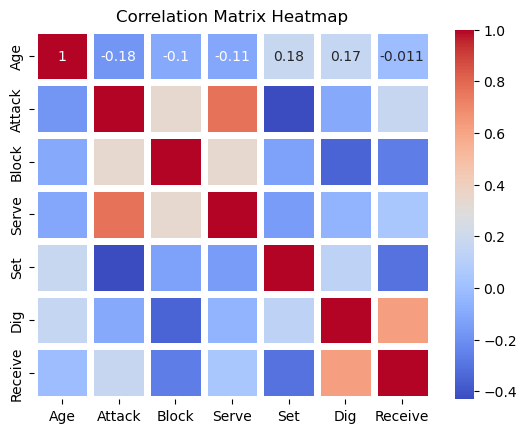

In [42]:
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", linewidths = 5)
plt.title("Correlation Matrix Heatmap")
plt.show()

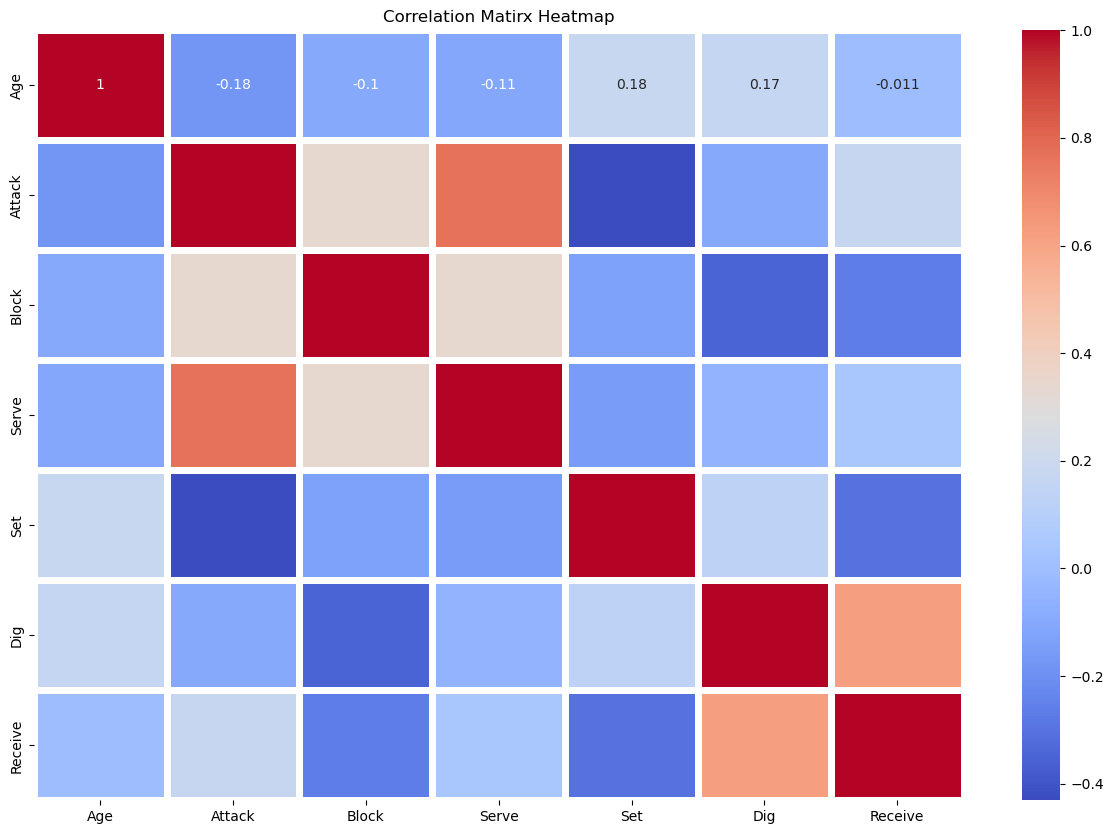

In [48]:
plt.figure(figsize= (15, 10))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", linewidths= 5)
plt.title("Correlation Matirx Heatmap")
plt.show()